# Creating Adversarial Images

The paper [Adversarial Machine Learning in Image Classification](https://dl.acm.org/doi/pdf/10.1145/3485133?casa_token=dKsj5CyofT4AAAAA:5ZuX5-w44St-o_HrKfkqgh6WxtE0R2Z29LgVSNSd-flziEX-F3j8PSQKEEzSB-7aNtJDOpZXX7XU) explains many of the concepts within the area of adversarial attacks in image classification.

Firstly, this is the general approach that is applied to an image to create an adversarial image.

Say we represent an image classification model by $f$ and an image it takes as input by $x$. Then the classification model is essentially a map $x \mapsto f(x)$. For each image $x$, a new image $x'=x+ \delta x$ can be created such that $f(x) \neq f(x')$, i.e. the classification has changed. This alteration $ \delta x$ is know as a perturbation. 

There are many things to consider when creating an adversarial attack. 

### Pertubation Scope
Pertubations can either be individual-scoped or universal-scoped. Invidual-scoped means that the perturbation generated is dependent on the input image; universal-scoped means it is not.

### Visibility of Perturbations
Perturbations can be categorised on the most basic level into indistinguishable or visible. Indistinguishable means that the perturbation was too small to fool the neural network, and it would not be visible to humans either. Visible means that the neural network was fooled but the perturbation is noticeable to humans. An extreme of this is called 'fooling' and means the image would be unrecoginsable as the original to a human. Somewhere there is an optimal perturbation that leads to misclassification but would not be noticed by a human. 

### Types of Attack

#### Attacker's Influence
There may be cases in which the attacker has access to the training of the model in some way, in which case they can control the output of the classification to some extent by what the model is trained on. We will assume that this was not the case in our project.

#### Attacker's Knowledge
There are a few types of attack that are often tested against when reviewing the robustness of a model: white-box attacks, black-box attacks and grey-box attacks. White-box means that the attacker knows what classification model is used in its entirety, as well as its defenses to adversarial attacks. Black-box means that the attacker has no knowledge of the model or its defenses, although it is usually assumed that the attacker is able to query the model in large quantities. Grey-box means that the attacker has knowledge of the model but not of its defenses.

In this project we will look into both black-box attacks and grey-box attacks. We will not look into making new attacks based on the defenses we produce.

#### Attack Specificity 
Some attacks might try to produce a specific misclassification, whereas some are just looking to achieve any misclassification. Due to time restraints, we will not look into producing certain misclassifications, even though it could be something of interest to look into.

### Our Approach
By considering the specific hypothetical problem of pysical adversarial alterations being made to road signs in order to impact driverless cars, we both narrow the problem down as well as introduce new practicality issues. There are many ways in which adversarial images are created, many of which would probably not have much application to this setting, such as changes to colour, blurring, rotation, and effects on the shape. We will therefore only consider perturbations which could correspond to something that could be stuck on to a road sign.

It would be the most likely case in our real-world application that the attacker would not have access to internal information regarding the model, so we begin by considering that case. We mentioned previously that with black-box attacks, it is generally assumed that the attacker can query the model many times, but that would probably not be the case with this application. To query the model, a physical sign would have to be shown to a car, which would be very time consuming.

So, firstly we will look at adversarial image generation techniques that do not take into account the model. Our approach will be to add in random noise and occlusions. Random noise refers changing the pixels randomly to make small changes to the image. An example is Gaussian noise, which is when a random amount (drawn from a Gaussian distribution) of colour and brightness change is added to each pixel. Occulusions refer to blocking off part of the image; this may be with a blank shape or could be another object.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.random.seed(1)

In [7]:
#!pip3 install opencv-python
import cv2 as cv

In [12]:
import matplotlib.pyplot as plt

In [103]:
img = cv.imread("cat.png")  


In [105]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

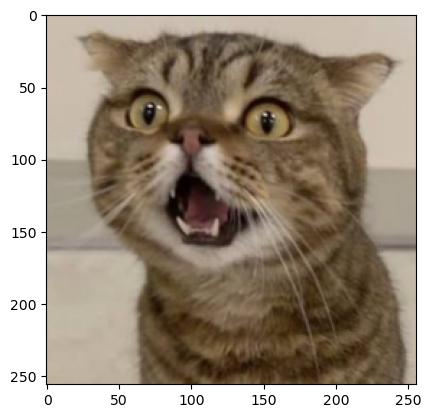

In [106]:
plt.imshow(img)

In [163]:
#https://www.kaggle.com/code/basu369victor/low-light-image-enhancement-with-cnn#IMAGE-WITH-NOISE(SALT-AND-PEPPER-NOISE)
#mean = 0
#stddev = 50
#noise = np.zeros_like(img)
#cv.randn(noise, mean, stddev)
#noisy_img = cv.add(img, noise)

#mean_noise = np.mean(noise)
#std_noise = np.std(noise)
#normalized_img = (noisy_img - mean_noise) / std_noise

row,col,ch= img.shape
mean = 0
var =0.5
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col,ch))
#gauss = gauss.reshape(row,col,ch)
noisy = cv.add(gauss.astype(np.uint8), img.astype(np.uint8))

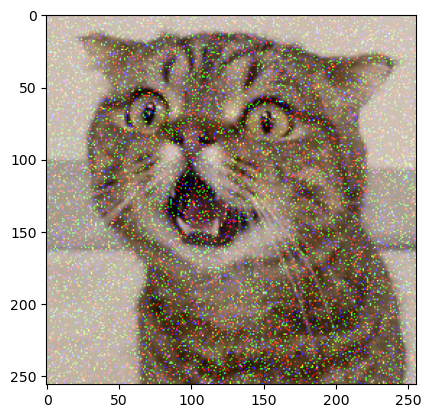

In [164]:
plt.imshow(noisy)

In [ ]:
#C&W attack
import tensorflow as tf
from cleverhans.attacks import CarliniWagnerL2

# Load the trained model
model = tf.keras.models.load_model('path/to/model')

# Define the attack
attack = CarliniWagnerL2(model)

# Load the test image
image = tf.keras.preprocessing.image.load_img('path/to/image', target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Generate the adversarial example
adv_example = attack.generate(tf.convert_to_tensor(image), eps=0.3)

# Check if the model misclassifies the adversarial example
adv_prediction = model.predict(tf.expand_dims(adv_example, axis=0))
adv_class = tf.argmax(adv_prediction[0])
if adv_class != target_class:
    print("Misclassified the adversarial example!")
